<!DOCTYPE html>
<html data-n-head="%7B%22lang%22:%7B%22ssr%22:%22en%22%7D%7D" data-n-head-ssr="" lang="en">
<head>
<meta charset="utf-8"/>
<meta content="width=device-width,initial-scale=1,minimum-scale=1" name="viewport"/>
<meta content="IE=edge" http-equiv="X-UA-Compatible"/>
<title>List of companies - 762.3k companies | AmbitionBox</title><meta content="2022 AmbitionBox" data-n-head="ssr" name="copyright"/><meta content="1 day" data-n-head="ssr" name="revisit-after"/><meta content="AmbitionBox" data-n-head="ssr" name="application-name"/><meta content="EN" data-n-head="ssr" name="content-language"/><meta content="462822053404-hphug4pkahqljh2tc96g35at47o4isv2.apps.googleusercontent.com" data-n-head="ssr" name="google-signin-client_id"/><meta content="712617688793459" data-n-head="ssr" property="fb:app_id"/><meta content="#ffffff" data-n-head="ssr" name="theme-color"/><meta content="#ffffff" data-n-head="ssr" name="msapplication-navbutton-color"/><meta content="default" data-n-head="ss
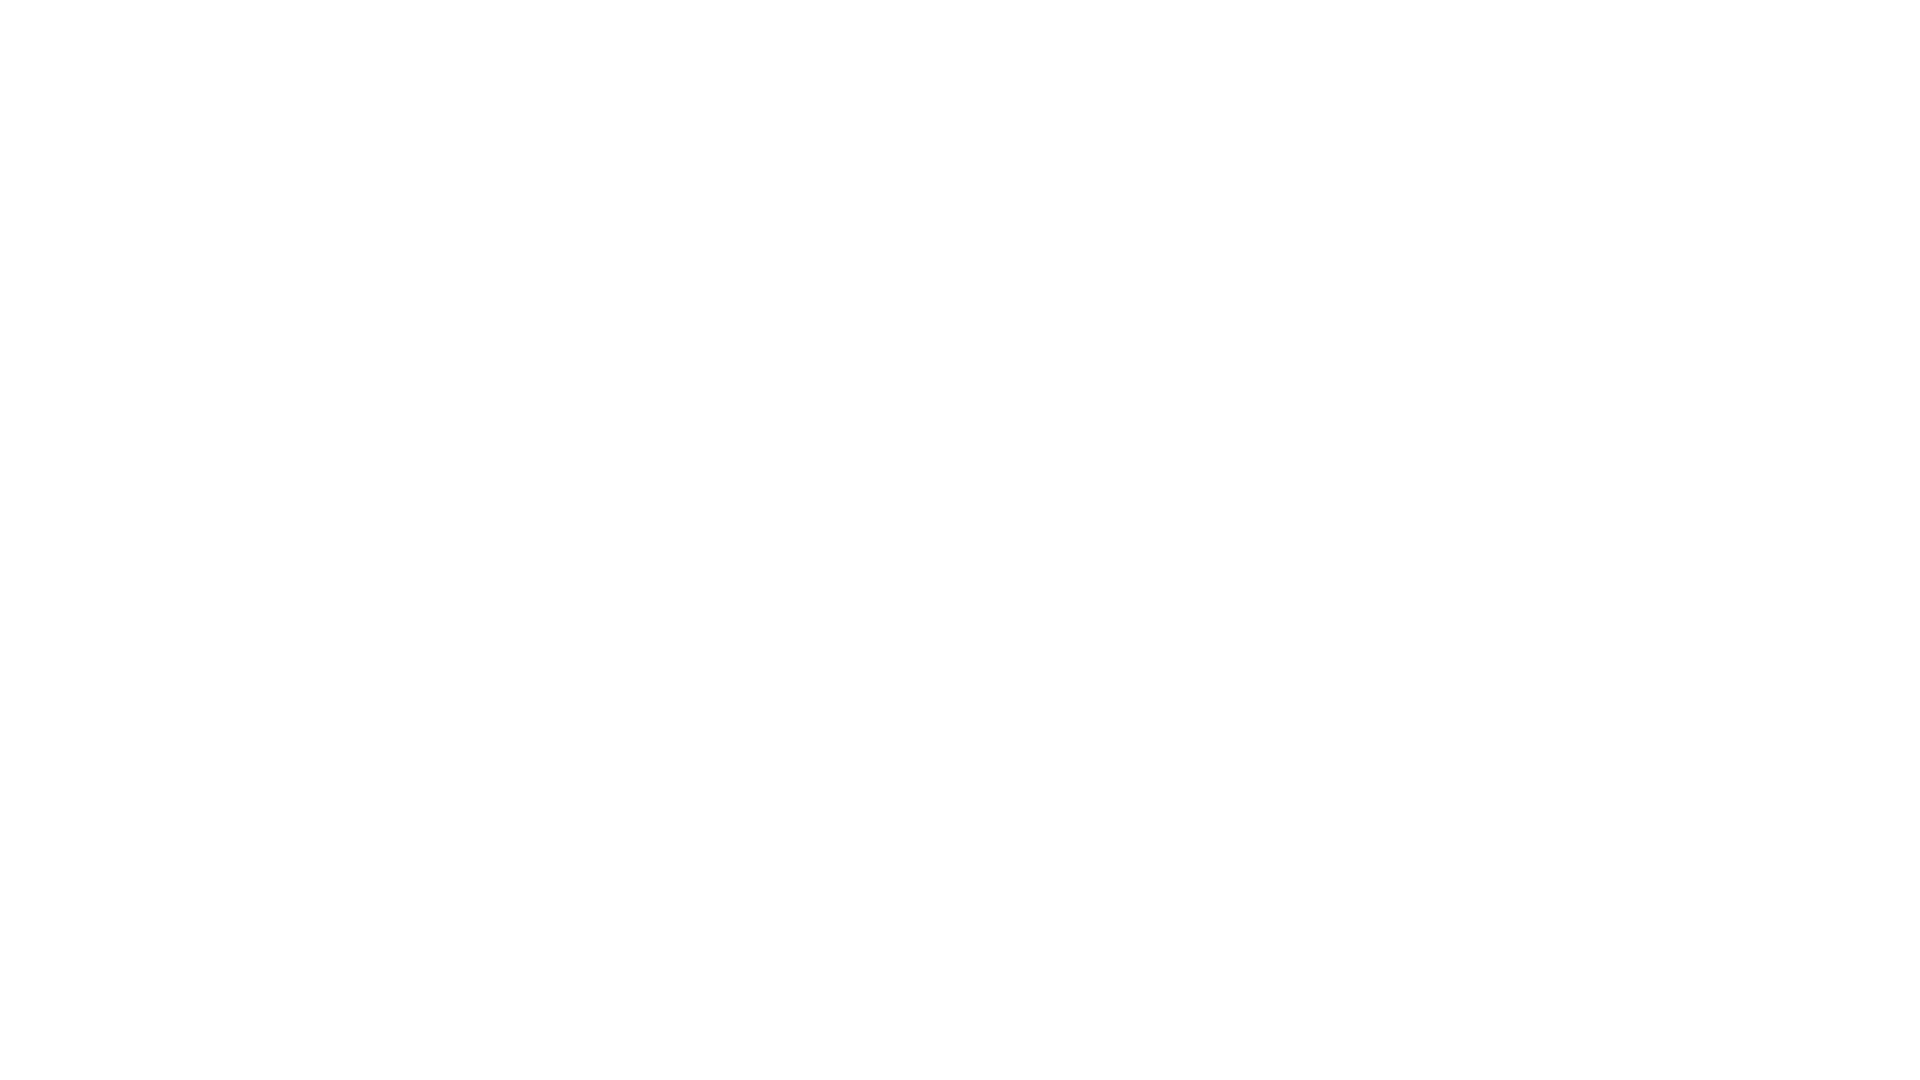

In [2]:
import requests
import pandas as pd
from bs4 import BeautifulSoup
url="https://www.ambitionbox.com/list-of-companies?page=1"
headers = {"User-Agent":"Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_4) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/83.0.4103.97 Safari/537.36"}
page=requests.get(url,headers=headers)
soup=BeautifulSoup(page.content,'lxml')
soup

In [3]:
all_comp=soup.find_all(class_="company-info-wrapper")
len(all_comp)

30

In [4]:
first=all_comp[0]
first

<div class="company-info-wrapper"><div class="company-info"><div class="left"><a href="/overview/tcs-overview"><h2 class="company-name bold-title-l" title="TCS">
									TCS
								</h2></a> <div class="rating-wrapper"><p class="rating badge-large rating-35"><i class="icon icon-star"></i>
									3.9
								</p> <a class="review-count sbold-Labels" href="https://www.ambitionbox.com/reviews/tcs-reviews">
									(51.1k Reviews)
								</a></div></div> <button class="ab_btn follow-btn invert round"><span class="ctas-btn-medium">Follow</span></button></div> <div class="leaf-list-wrapper noscrollbars-sm mg-btm-16 mg-top-4" data-v-1018e3e7=""><div class="award-leaf" data-v-1018e3e7="" data-v-57e129ff=""><img alt="award" data-v-57e129ff="" height="26" src="https://static.ambitionbox.com/static/awards/black-theme/golden-leaf-left.png" width="15"/> <img alt="AmbitionBox awards" class="ambox-logo" data-v-57e129ff="" height="17" src="https://static.ambitionbox.com/static/awards/black-theme

In [24]:
comp=soup.find_all(class_="ab-company-result-card")
len(comp)

30

In [25]:
first1=comp[0]
first1

<div class="ab-company-result-card" itemprop="itemListElement" itemscope="itemscope" itemtype="http://schema.org/ListItem"><meta content="1" itemprop="position"/> <meta content="TCS" itemprop="name"/> <meta content="Tata Consultancy Services" itemprop="alternateName"/> <meta content="https://www.ambitionbox.com/overview/tcs-overview" itemprop="url"/> <meta content="https://static.ambitionbox.com/alpha/company/photos/logos/tcs.jpg" itemprop="image"/> <div class="company-content-wrapper"><div class="company-content"><div class="company-logo"><img alt="Tata Consultancy Services logo" class="lazy" data-src="https://static.ambitionbox.com/assets/v2/images/rs:fit:200:200:false:false/bG9jYWw6Ly8vbG9nb3Mvb3JpZ2luYWxzL3Rjcy5qcGc.webp" height="100" onerror="this.onerror=null;this.src='/static/icons/company-placeholder.svg';" src="https://static.ambitionbox.com/static/icons/company-placeholder.svg" width="100"/></div> <div class="company-info-wrapper"><div class="company-info"><div class="left"><

In [26]:
fn=first1.find(class_="company-name").get_text().strip()
fn

'TCS'

In [27]:
import re
frr=re.sub(r"[\s]",'',first1.find(class_="rating-wrapper").get_text()).split('(')
frate=frr[0]
frev=frr[1]
frate, frev

('3.9', '51.1kReviews)')

In [47]:
basic_info=', '.join([t.get_text().strip() for t in first1.find_all(class_="infoEntity")])
basic_info

'Public, Mumbai,Maharashtra + 280 more, 54 years old, 1 Lakh+ Employees (India)'

In [48]:
services=', '.join([t.get_text().strip() for t in first1.find_all(class_="ab_chip body-medium")])
services

'BPO, IT Services & Consulting, Forbes Global 2000, Fortune India 500, Public, Mumbai,Maharashtra'

In [41]:
desc=first1.find(class_="description").get_text().strip().replace('\n','')
desc

'We ensure the highest levels of certainty and satisfaction through a deep-set commitment to our clients, comprehensive industry expertise and a global network of innovation and delivery centers.We function as a full stakeholder to business, offering a consulting-led approach with an integrated portfolio of technology led solutions that encompass the entire Enterprise value chain. Our Customer-centric Engagement Model defines how we do engage with you, offering specialized services and solutions that meet the distinct needs of your business.We build bespoke teams around your domain and technology requirements drawn from our talent pool of over 488,649 global professionals including 36.5% women from 154 nationalities. Our domain expertise has been built upon decades of experience working across industries and this knowledge underpins our suite of solutions.Our organization structure is domain led and empowered to help provide Customers a single window to industry specific solutions. Agi

In [38]:
info2=[re.sub(r'[\s]+',' ',t.get_text().strip()) for t in first1.find(class_="company-action-center").find_all('li')]
info2

['About', 'Reviews 51.1k', 'Salaries 646k', 'Interviews 3.9k', 'Jobs 55']

In [42]:
names, ratings, reviews, info1, info2, services, desc = [],[],[],[],[],[],[]
for p in comp:
    names.append(p.find(class_="company-name").get_text().strip())
    frr=re.sub(r"[\s]",'',p.find(class_="rating-wrapper").get_text()).split('(')
    ratings.append(frr[0])
    reviews.append(frr[1])
    info1.append(', '.join([t.get_text().strip() for t in p.find_all(class_="infoEntity")]))
    services.append(', '.join([t.get_text().strip() for t in p.find_all(class_="ab_chip body-medium")]))
    desc.append(p.find(class_="description").get_text().strip().replace('\n',''))
    info2.append(', '.join([re.sub(r'[\s]+',' ',t.get_text().strip()) for t in p.find(class_="company-action-center").find_all('li')]))
len(names), len(ratings), len(reviews), len(info1), len(info2), len(services), len(desc)

(30, 30, 30, 30, 30, 30, 30)

In [49]:
names, ratings, reviews, info1, info2, services, desc = [],[],[],[],[],[],[]
for i in range(1,151):
    url=f"https://www.ambitionbox.com/list-of-companies?page={i}"
    page=requests.get(url,headers=headers)
    soup=BeautifulSoup(page.content,'lxml')
    comp=soup.find_all(class_="ab-company-result-card")
    for p in comp:
        names.append(p.find(class_="company-name").get_text().strip())
        frr=re.sub(r"[\s]",'',p.find(class_="rating-wrapper").get_text()).split('(')
        ratings.append(frr[0])
        reviews.append(frr[1])
        info1.append(', '.join([t.get_text().strip() for t in p.find_all(class_="infoEntity")]))
        services.append(', '.join([t.get_text().strip() for t in p.find_all(class_="ab_chip body-medium")]))
        if p.find(class_="description"):
            desc.append(p.find(class_="description").get_text().strip().replace('\n',''))
        else:
            desc.append(None)
        info2.append(', '.join([re.sub(r'[\s]+',' ',t.get_text().strip()) for t in p.find(class_="company-action-center").find_all('li')]))

len(names), len(ratings), len(reviews), len(info1), len(info2), len(services), len(desc)    

(4498, 4498, 4498, 4498, 4498, 4498, 4498)

In [50]:
d={"Names":names, 'Ratings':ratings,'Reviews':reviews,"Basic Info":info1, "Services":services, "Basic Info2":info2,"Description":desc}
df=pd.DataFrame(d)
df

,Names,Ratings,Reviews,Basic Info,Services,Basic Info2,Description
0,TCS,3.9,51.1kReviews),"Public, Mumbai,Maharashtra + 280 more, 54 year...","BPO, IT Services & Consulting, Forbes Global 2...","About, Reviews 51.1k, Salaries 646k, Interview...",We ensure the highest levels of certainty and ...
1,Accenture,4.1,33.1kReviews),"Public, Dublin + 144 more, 33 years old, 1 Lak...","IT Services & Consulting, Software Product, Fo...","About, Reviews 33.1k, Salaries 446.5k, Intervi...",Accenture is a global professional services co...
2,Cognizant,3.9,30.4kReviews),"Private, Teaneck. New Jersey. + 101 more, 28 y...","IT Services & Consulting, Forbes Global 2000","About, Reviews 30.4k, Salaries 438.6k, Intervi...","At Cognizant, we give organizations the insigh..."
3,ICICI Bank,4.0,35.5kReviews),"Public, Mumbai,Maharashtra + 1052 more, 28 yea...","Financial Services, Banking, Forbes Global 200...","About, Reviews 35.5k, Salaries 158.2k, Intervi...",ICICI Bank is a leading private sector bank in...
4,HDFC Bank,4.0,40.8kReviews),"Public, Mumbai,Maharashtra + 1231 more, 28 yea...","Financial Services, Banking, Insurance, Forbes...","About, Reviews 40.8k, Salaries 153k, Interview...",The Housing Development Finance Corporation Li...
...,...,...,...,...,...,...,...
4493,cFIRST,4.1,123Reviews),"Private, Cincinnati + 5 more, 16 years old, 20...","Recruitment, IT Services & Consulting","About, Reviews 123, Salaries 441, Interviews 2...",Pre-employment screening is an essential compo...
4494,Capillary Techno...,4.0,123Reviews),"Private, Singapore,Singapore + 3 more, 14 year...","Internet, IT Services & Consulting, Software P...","About, Reviews 123, Salaries 1.4k, Interviews ...","Since 2008, Capillary has been at the forefron..."
4495,GAIN Credit,4.6,123Reviews),"Private, San Diego,California + 5 more, 19 yea...",FinTech,"About, Reviews 123, Salaries 573, Interviews 9...",We are an award-winning and market-leading fin...
4496,HSBC Global Bank...,3.9,123Reviews),"Public, Canary Wharf,London + 8 more, 31 years...","Banking, Public","About, Reviews 123, Salaries 1.4k, Interviews ...",Global Banking and Markets exists to help clie...


In [51]:
df.to_csv("ambition_box_companies.csv",index=False)